## OBJETIVO: Realizar classificação dos vinhos em BONS e RUINS de acordo com a variável de Output(resposta).
- Input variables (PREDITORAS): <br>
   1) fixed acidity 
   2) volatile acidity
   3) citric acid
   4) residual sugar
   5) chlorides
   6) free sulfur dioxide
   7) total sulfur dioxide
   8) density
   9) pH
   10) sulphates
   11) alcohol
- Output variable (TARGET): <br>
   12) quality (score between 0 and 10)

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler #Padronização
from sklearn.preprocessing import MinMaxScaler #Normalização
from sklearn.model_selection import train_test_split #test treino
from sklearn.metrics import accuracy_score #acurácia
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn import svm #svm

In [175]:
white_wine_original = pd.read_csv(r'winequality-white.csv', sep=';')
white_wine_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [176]:
white_wine_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [177]:
#verifica se há valores nulos
white_wine_original.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [178]:
#analise descritiva
white_wine_original.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


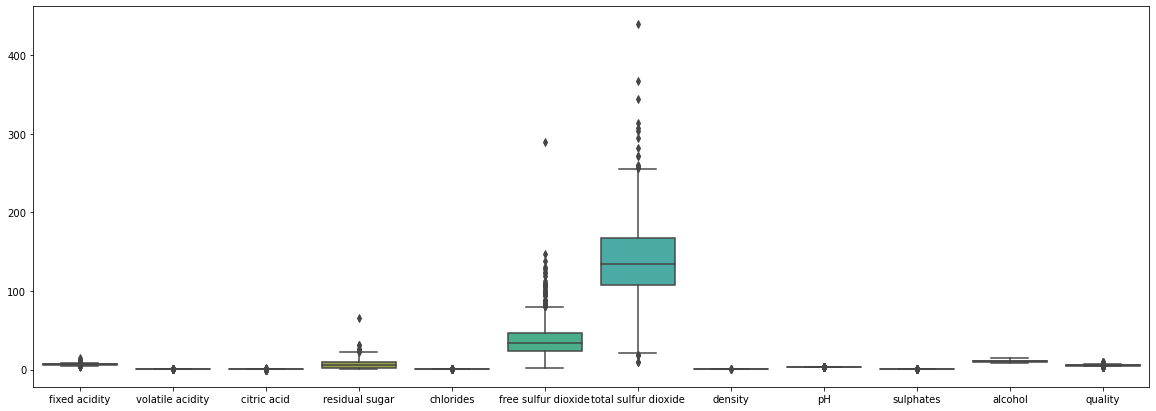

In [179]:
#distribuição
plt.figure(figsize=(20,7))
ax = sns.boxplot(data=white_wine_original)

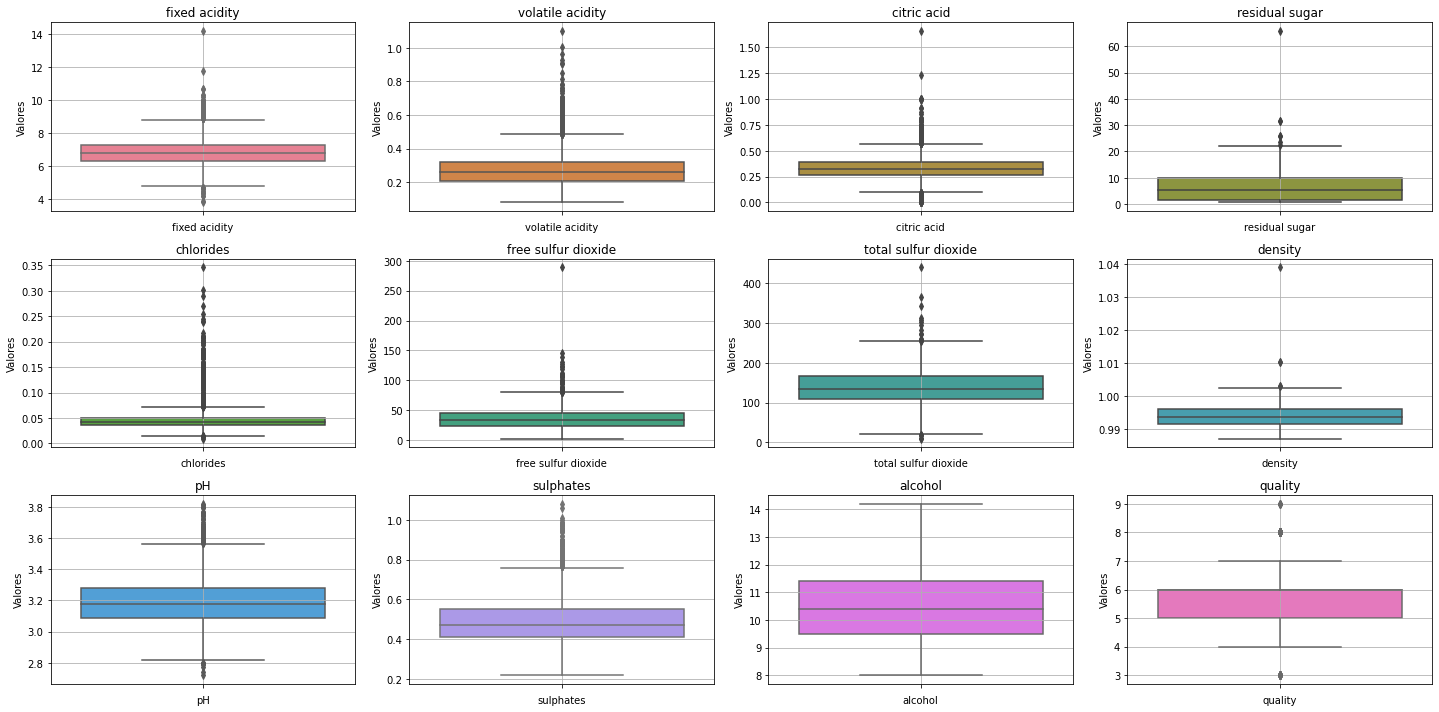

In [180]:
#subplot individual das variáveis

var_preditoras = [coluna for coluna in white_wine_original.columns]

plt.figure(figsize=(20, 10))
num_linhas = (len(var_preditoras) + 3) // 4  # num total de linhas  e Arredondamento para cima
cores = sns.color_palette("husl", len(var_preditoras)) #cores

# Subplots
for i, (coluna, cor) in enumerate(zip(var_preditoras, cores), 1):
     if white_wine_original[coluna].dtype in ['float64', 'int64']:
        plt.subplot(num_linhas, 4, i)
        sns.boxplot(y=white_wine_original[coluna], color=cor)
        plt.title(f'{coluna}')
        plt.ylabel('Valores')
        plt.xlabel(f'{coluna}')
        plt.grid(True)

plt.tight_layout()
plt.show()

Vamos olhar mais a fundo a variável TARGET

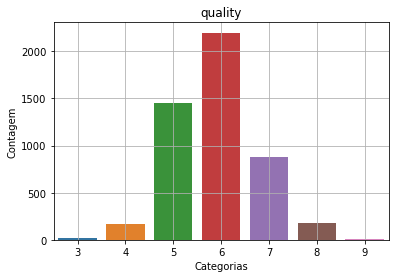

In [181]:
#conatgem das notas
sns.countplot(data=white_wine_original, x='quality')
plt.title('quality')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

Vamos dividir as categrias nas qualidades: ruim, média e boa a partir dos quartis

In [182]:
#calcula quartis
primeiro_quartil = np.percentile(white_wine_original['quality'], 25)
terceiro_quartil = np.percentile(white_wine_original['quality'], 75)

#define limite das classes
quality_classes = []
for nota in white_wine_original['quality']:
    if nota <= primeiro_quartil:
        quality_classes.append('Qualidade ruim')
    elif nota > primeiro_quartil and nota <= terceiro_quartil:
        quality_classes.append('Qualidade media')
    else:
        quality_classes.append('Qualidade boa')

#transforma em df 
target = pd.DataFrame({'class': quality_classes})

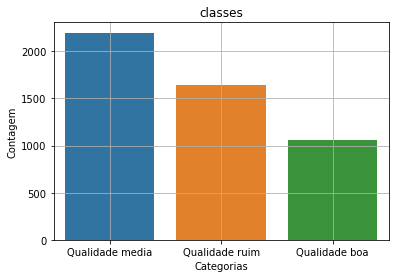

In [183]:
#conatgem das classes
sns.countplot(data=target, x='class')
plt.title('classes')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

Para não trabalharmos com string, vamos coverter as classes p/ numeros

In [184]:
#mapeamento das classes
mapeamento = {
    'Qualidade ruim': 0,
    'Qualidade media': 1,
    'Qualidade boa': 2
}

target['class_num'] = target['class'].map(mapeamento)

Antes de PADRONIZAR ou NORMALIZAR vamos separar em PREDITORAS e ALVO

In [185]:
var_pred = white_wine_original.copy()

In [186]:
var_alvo = pd.DataFrame(target.iloc[:, 1], columns=['class_num'])

#### PADRONIZAÇÃO

In [187]:
#objeto de padronização
white_obj_padronizacao = StandardScaler().fit(var_pred)

In [188]:
#padronizando
white_wine_padronizado = white_obj_padronizacao.transform(var_pred)

In [189]:
#array dos dados padronizados
white_wine_padronizado

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

In [190]:
#transforma em df e renomeia colunas
white_wine_padronizado = pd.DataFrame(white_wine_padronizado)
white_wine_padronizado.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

white_wine_padronizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [191]:
#analise descritiva
white_wine_padronizado.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,7.584333e-17,5.196832e-16,6.019639e-16,-1.024542e-16,3.410456e-16,-4.671641e-17,1.057636e-16,3.220250e-14,-1.203860e-15,-7.572999e-16,-2.169718e-15,7.563366e-17
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00,-3.249862e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01,-9.913739e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02,1.378701e-01
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01,1.378701e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00,3.525602e+00


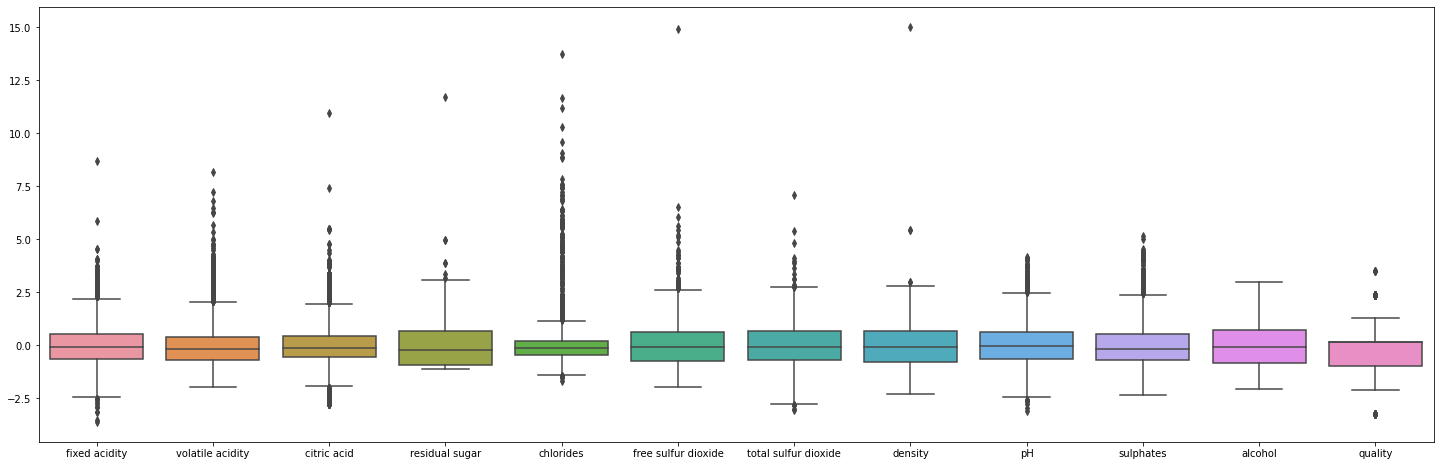

In [192]:
plt.figure(figsize=(25,8))
ax = sns.boxplot(data=white_wine_padronizado)

#### NORMALIZAÇÃO

In [193]:
#objeto de normalização
white_obj_normalizacao = MinMaxScaler().fit(var_pred)

In [194]:
#normalizando
white_wine_normalizado = white_obj_normalizacao.transform(var_pred)

In [195]:
#array dos dados normalizados
white_wine_normalizado

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.26744186, 0.12903226,
        0.5       ],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.31395349, 0.24193548,
        0.5       ],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.25581395, 0.33870968,
        0.5       ],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.27906977, 0.22580645,
        0.5       ],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.18604651, 0.77419355,
        0.66666667],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.11627907, 0.61290323,
        0.5       ]])

In [196]:
#transforma em df e reomeia colunas
white_wine_normalizado = pd.DataFrame(white_wine_normalizado)
white_wine_normalizado.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

white_wine_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


In [197]:
white_wine_normalizado.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,0.479652
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487,0.147606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935,0.333333
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,0.500000
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


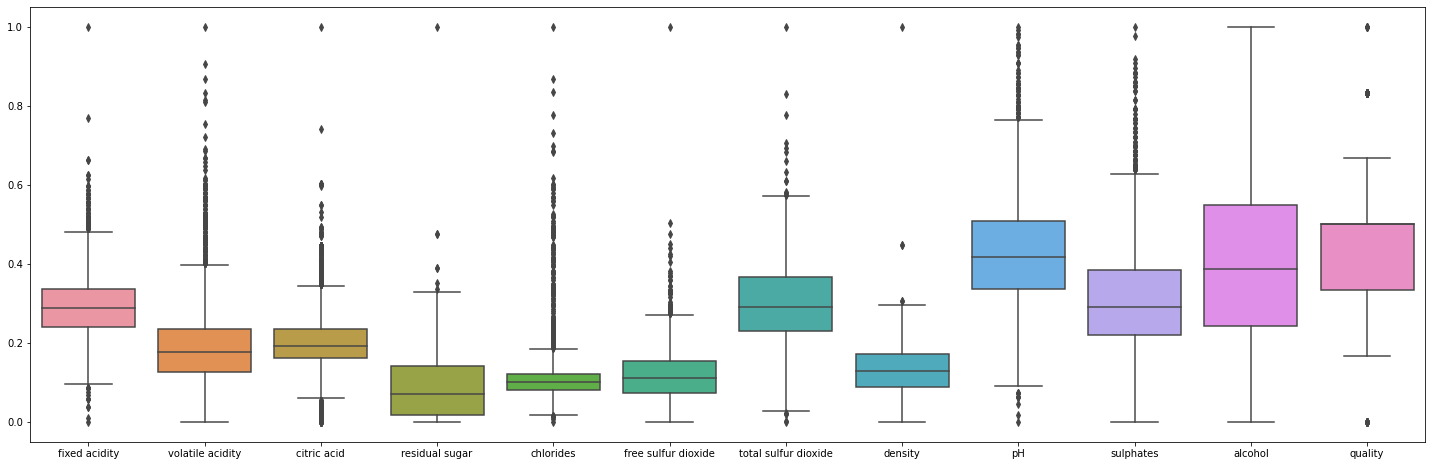

In [198]:
plt.figure(figsize=(25,8))
ax = sns.boxplot(data=white_wine_normalizado)

### MODELOS

#### KNN

Dados Padronizados

In [199]:
#separa 70% treino e 30% teste.
x_train, x_test, y_train, y_test = train_test_split(white_wine_padronizado, var_alvo, test_size=0.3, random_state=10)

In [200]:
#classificador knn obj
knn = KNeighborsClassifier()

In [201]:
#treinamento do modelo
knn.fit(x_train, y_train)

c:\Users\annab\beatrizbeserra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [202]:
#previsões teste
knn_resultP = knn.predict(x_test)

In [203]:
#acurácia do modelo
score = accuracy_score(y_test, knn_resultP)
print('Score: {}. Ou seja, a cada 100 previsões com os dados PADRONIZADOS, o modelo acerta {:.2%} das vezes'.format(score, score))

Score: 0.936734693877551. Ou seja, a cada 100 previsões com os dados PADRONIZADOS, o modelo acerta 93.67% das vezes


dados normalizados

In [204]:
#separa 70% treino e 30% teste
x_train, x_test, y_train, y_test = train_test_split(white_wine_normalizado, var_alvo, test_size=0.3, random_state=10)

In [205]:
#classifica knn obj
knn = KNeighborsClassifier()

In [206]:
#treinamento
knn.fit(x_train, y_train)

c:\Users\annab\beatrizbeserra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [207]:
#previsões teste
knn_resultN = knn.predict(x_test)

In [208]:
#acurácia do modelo
score = accuracy_score(y_test, knn_resultN)
print('Score: {}. Ou seja, a cada 100 previsões com os dados NORMALIZADOS, o modelo acerta {:.2%} das vezes'.format(score, score))

Score: 0.9843537414965986. Ou seja, a cada 100 previsões com os dados NORMALIZADOS, o modelo acerta 98.44% das vezes
